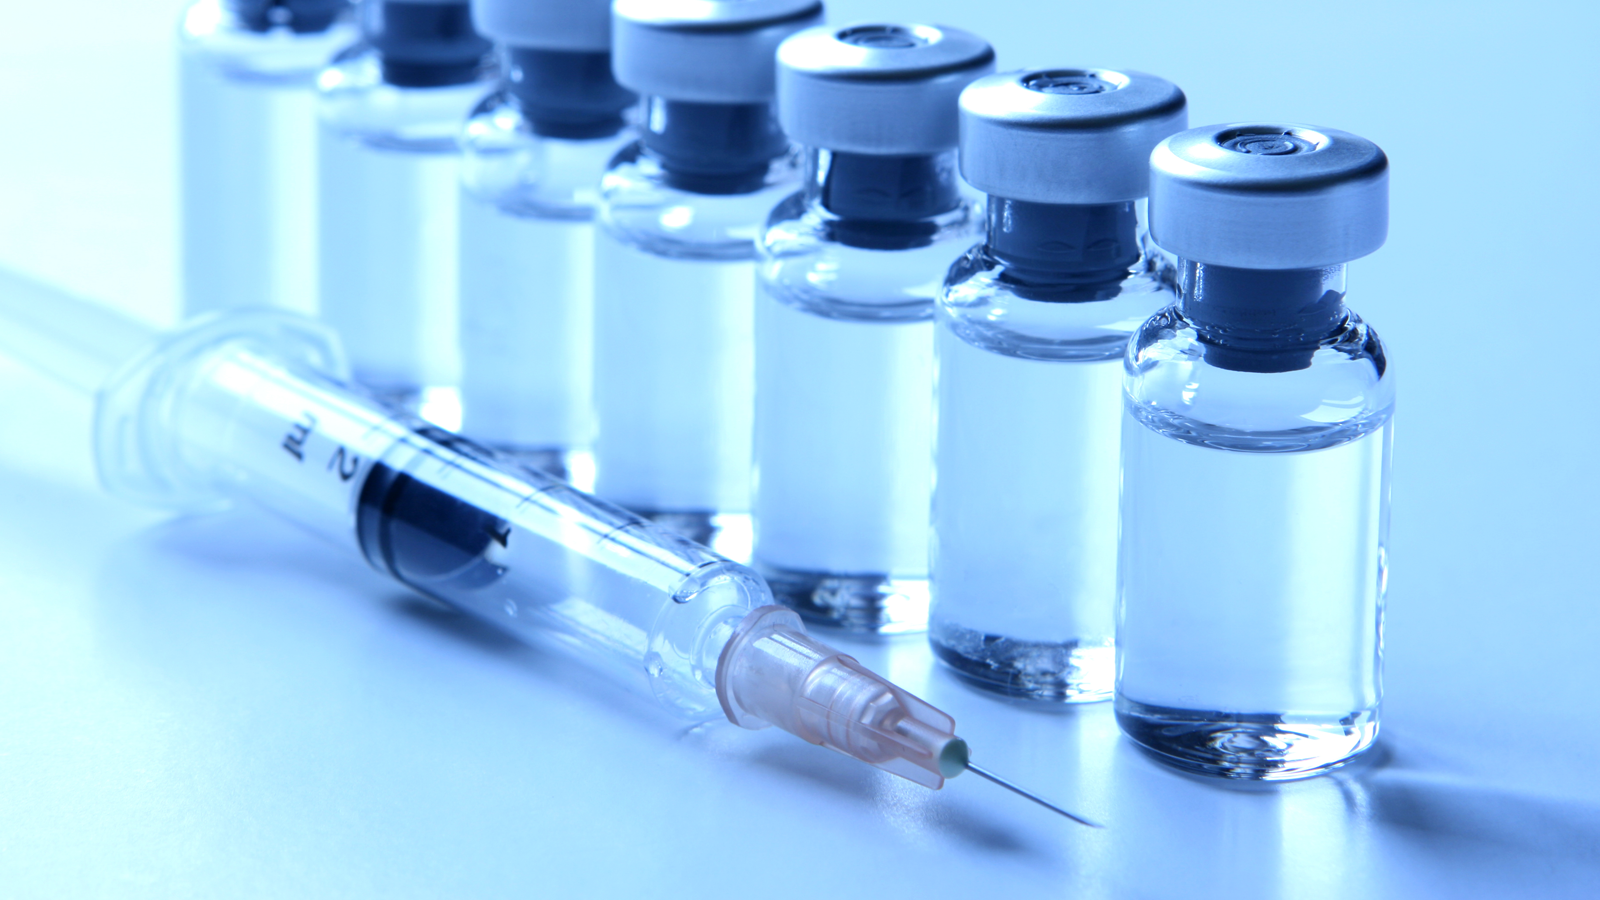
**Image Source:** FDA.gov

# Seasonal Flu Vaccination Prediction Analysis

**Authors:**   Anthony (GL), Ermiyas (PL), and Sangwon (TL)

## Project Overview

A study published in the Journal of the American Medical Association estimated that childhood vaccinations administered from 1994 to 2013 in the US would save \\$402 billion in direct costs and $1.5 trillion in societal costs.

According to the Centers for Disease Control and Prevention (CDC), every dollar invested in childhood vaccinations in the US yields a return of \\$10.10 in healthcare savings and \\$18.40 in overall societal benefits. In the low- and middle-income countries, the return on investment of immunization programs is estimated to be \\$52 per $1 invest when considering the broader social and economic costs avoided by vaccination.

As the aforementioned studies exhibit, mass immunization / vaccination has an immense societal and economic benefits. This project offers a comprehensive analysis of what factors (e.g., doctor's recommendation for a vaccine) have the biggest influence on a person from getting vaccinated. The project employs two predictive models (i.e., logistic regression and decision tree) to best predict the vaccination outcome based on various factors provided by the dataset. 

The analysis aims to offer valuable insights to Jelly Insurance Co's leadership team, empowering them to take the most effective actions to boost vaccination rates among policyholders. This initiative seeks to reduce insurance payouts resulting from non-vaccination.

## Business Problem

Jelly Insurance Co's policyholders have the lowest vaccination rate amongst all US insurance / healthcare companies. In order to reduce insurance payouts resulting from low vaccination rate, the leadership team has tasked the team to delve into vaccination databases for insights. 

The leadership team is interested in understanding what are **the most effective methods to increase vaccination rate.**

## Data Understanding and Preparation

For this project, following dataset was utilized for the analysis:

- 2009 National H1N1 and Flu Vaccination Survey by the United States National Center for Health Statistics

The dataset comprises of ~27k phone survey data conducted between late 2009 and early 2010. The phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about them. The additional questions include: social, economic, demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. 

We first start off the analysis by pulling the right packages

In [1]:
# Pulling right packages
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, plot_roc_curve, \
                            accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Import the data files
df_features = pd.read_csv("data/training_set_features.csv")
df_labels = pd.read_csv("data/training_set_labels.csv")

In [3]:
# Check the shape of the two data files
print(df_features.shape)
print(df_labels.shape)

# There are same number of rows. So we can combines these two dataframes

(26707, 36)
(26707, 3)


In [4]:
# Checking the dataframe info
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
# Checking the dataframe info
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [6]:
# We can join the two df as they have the same column 'respondent_id'
df_merged = df_features.merge(df_labels, how='inner', on='respondent_id')

In [7]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

There are couple columns where there are a lot of null values (e.g., health insurance). We will need to think about how to treat the null values.

In [8]:
# Checking out the merged data columns
pd.set_option('display.max_columns', 1000)
df_merged.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0


In [9]:
# Checking for multicolinearity (greater than .8)
df_merged.drop('respondent_id', axis=1).corr()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
h1n1_concern,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,0.150206,0.135567,0.095162,0.049574,0.033562,-0.003655,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525,0.121929,0.154828
h1n1_knowledge,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,0.093829,0.071920,-0.022602,0.021598,0.170252,0.119408,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583,0.117951,0.120152
behavioral_antiviral_meds,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,0.051235,0.030909,0.008465,0.028788,0.009465,-0.063988,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822,0.040608,0.006277
behavioral_avoidance,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,0.068145,0.074088,0.039435,-0.000414,0.001180,0.032662,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328,0.047690,0.076395
behavioral_face_mask,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,0.084282,0.069481,0.068113,0.039726,0.069992,-0.040257,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826,0.070498,0.050083
behavioral_wash_hands,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,0.088729,0.102044,0.030260,0.036188,0.053761,0.031919,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764,0.074712,0.112414
behavioral_large_gatherings,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,0.082242,0.093557,0.104721,0.021168,-0.032319,-0.059000,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449,0.017822,0.064025
behavioral_outside_home,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,0.070346,0.085622,0.098858,0.018195,-0.034619,-0.061381,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558,0.021768,0.053509
behavioral_touch_face,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,0.088221,0.100808,0.028876,0.026640,0.067648,0.011024,0.104126,0.146080,0.131772,0.105798,0.143735,0.090097,-0.000553,0.023606,0.071648,0.120228
doctor_recc_h1n1,0.150206,0.093829,0.051235,0.068145,0.084282,0.088729,0.082242,0.070346,0.088221,1.000000,0.591868,0.158275,0.079389,0.101639,0.067157,0.152305,0.262826,0.113111,0.107512,0.202320,0.057128,0.004112,0.029040,0.393890,0.198607


No strong multicolinearity was observed amongst all the columns, which means that we can utilize all columns for the analysis

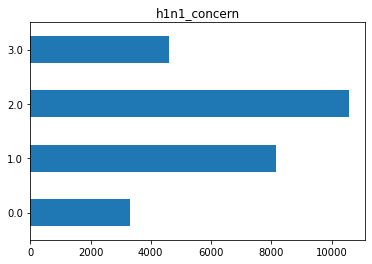

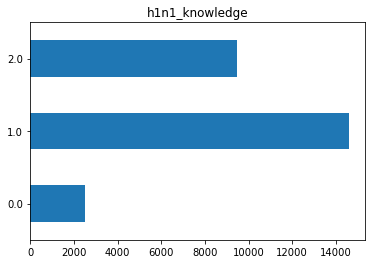

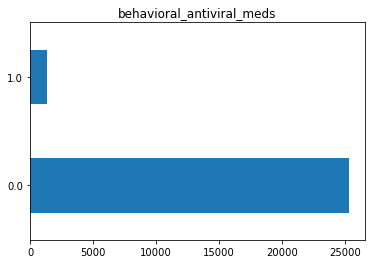

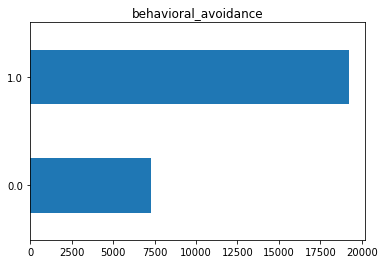

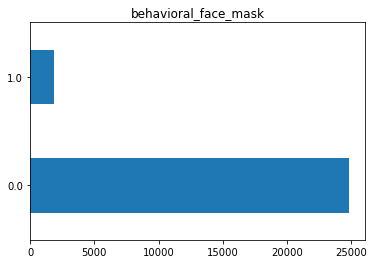

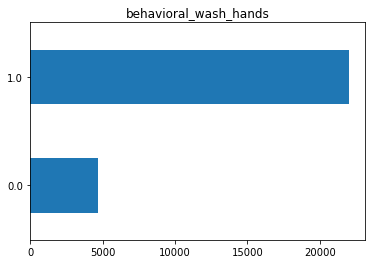

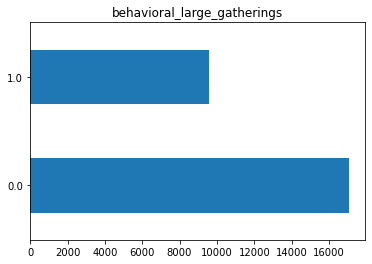

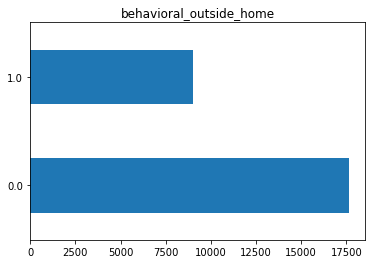

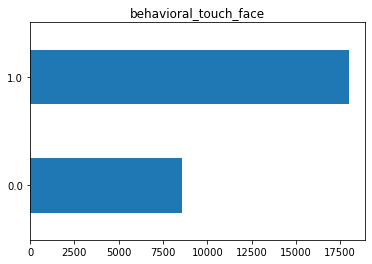

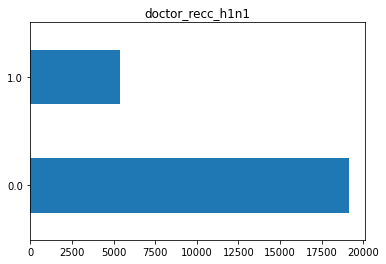

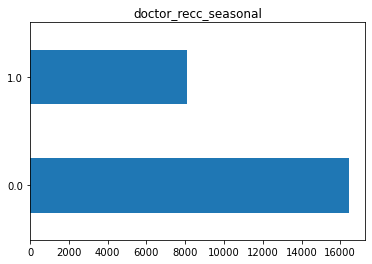

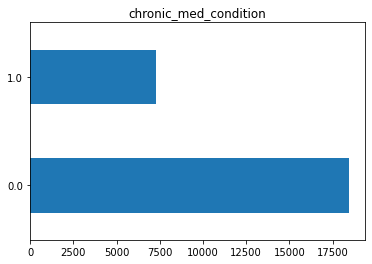

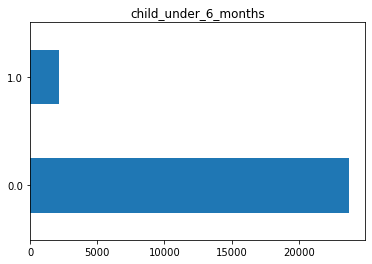

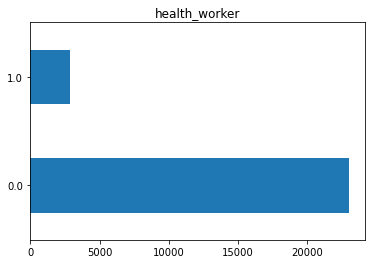

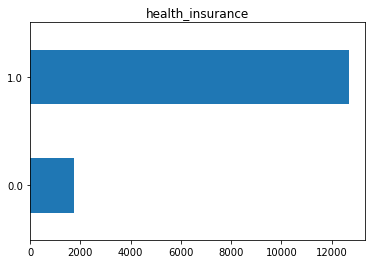

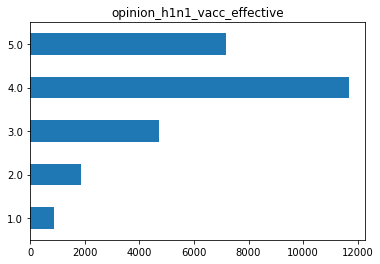

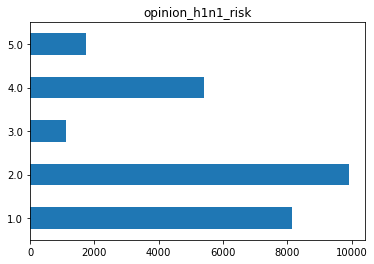

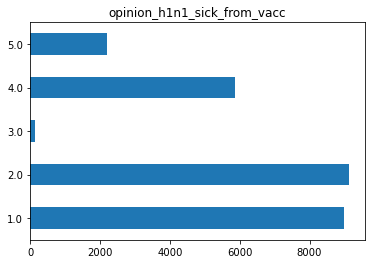

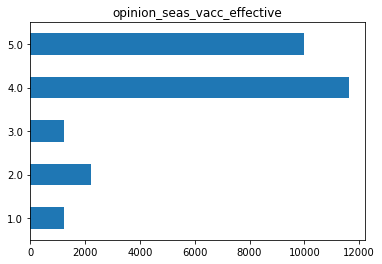

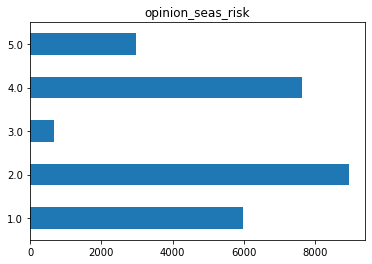

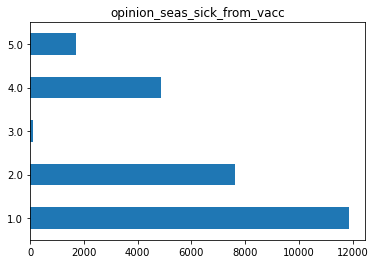

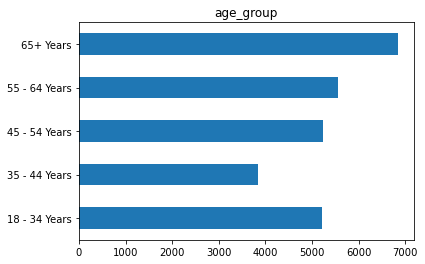

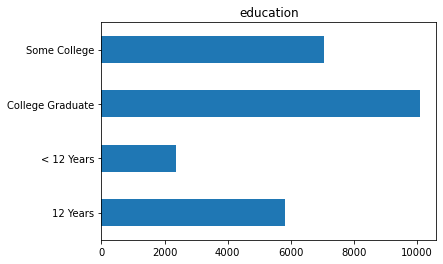

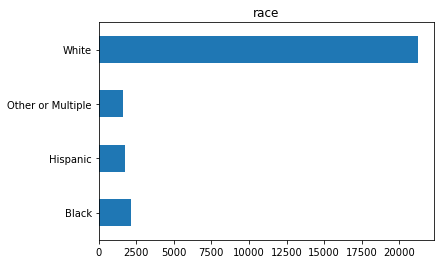

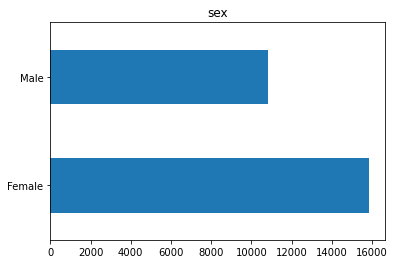

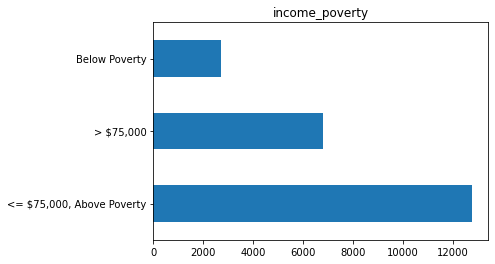

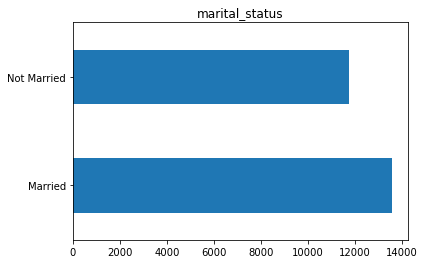

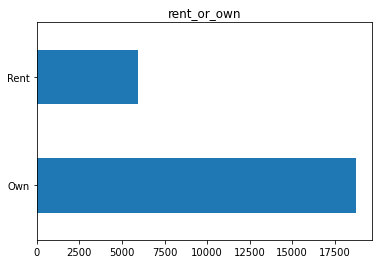

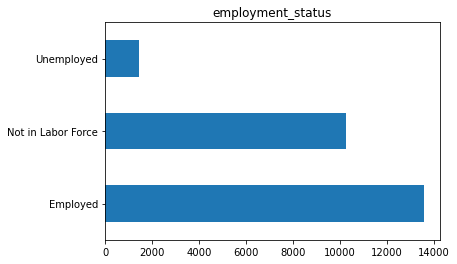

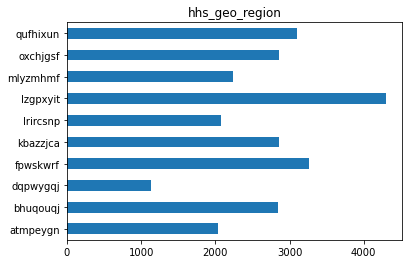

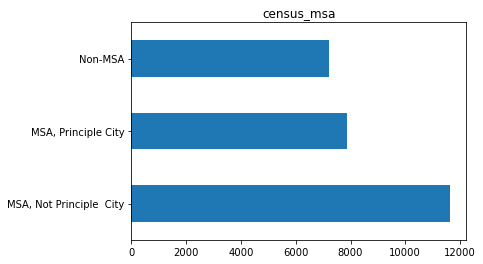

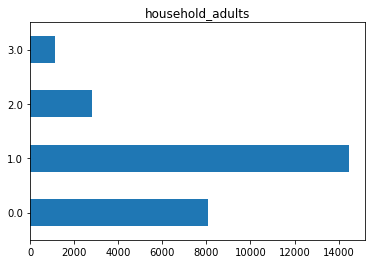

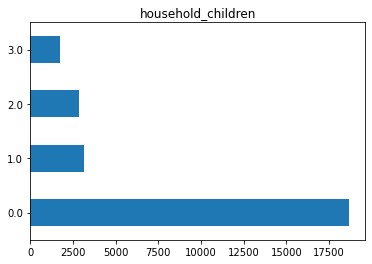

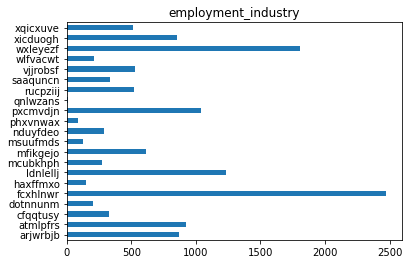

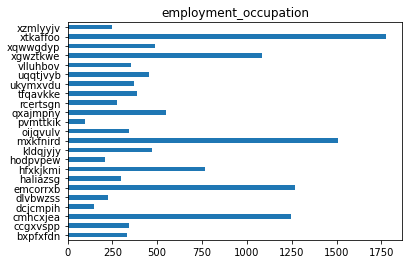

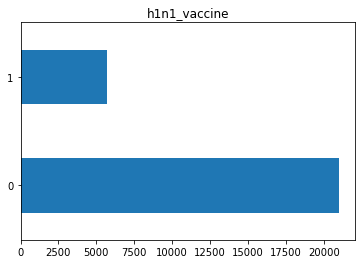

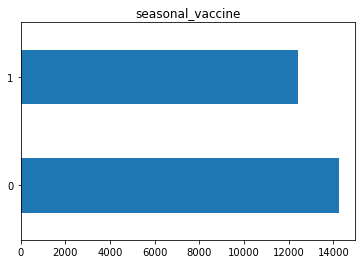

In [10]:
# bar chart view of each columns in the dataset

columns = df_merged.drop('respondent_id', axis=1)

for x in columns:
    df_merged[x].value_counts().sort_index().plot(kind='barh')
    plt.title(x)
    plt.show()

In [11]:
# value count view of each columns in the dataset

columns = df_merged.drop('respondent_id', axis=1)

for x in columns:
    print(df_merged[x].value_counts().sort_index())
    print()

0.0     3296
1.0     8153
2.0    10575
3.0     4591
Name: h1n1_concern, dtype: int64

0.0     2506
1.0    14598
2.0     9487
Name: h1n1_knowledge, dtype: int64

0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

0.0     7271
1.0    19228
Name: behavioral_avoidance, dtype: int64

0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64

0.0     4650
1.0    22015
Name: behavioral_wash_hands, dtype: int64

0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64

0.0    17644
1.0     8981
Name: behavioral_outside_home, dtype: int64

0.0     8578
1.0    18001
Name: behavioral_touch_face, dtype: int64

0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: int64

0.0    16453
1.0     8094
Name: doctor_recc_seasonal, dtype: int64

0.0    18446
1.0     7290
Name: chronic_med_condition, dtype: int64

0.0    23749
1.0     2138
Name: child_under_6_months, dtype: int64

0.0    23004
1.0     2899
Name: health_worker, dtype: int64

0.0     1736
1.0

There are 29 columns with numeric values and 9 columns with categorical values. All numeric columns are in range of 0-5 as they are responses to the survey questions, except for respondent ID. 

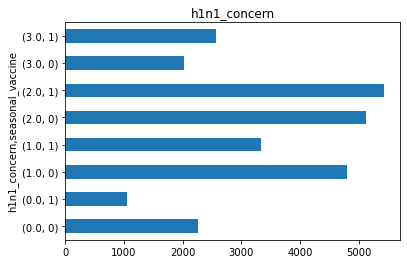

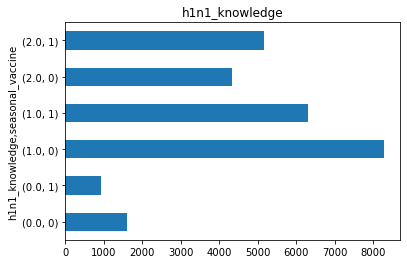

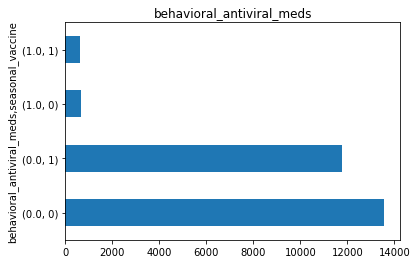

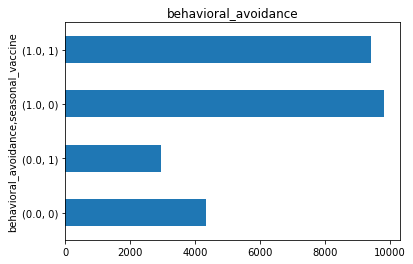

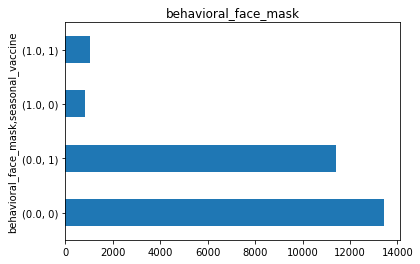

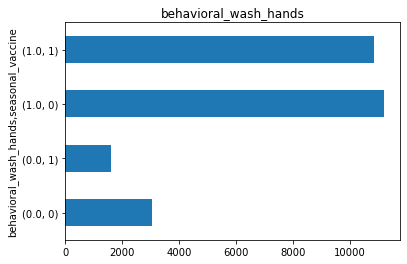

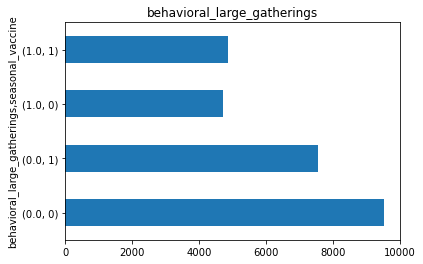

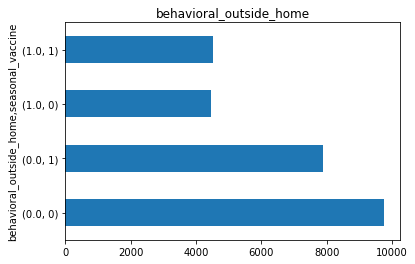

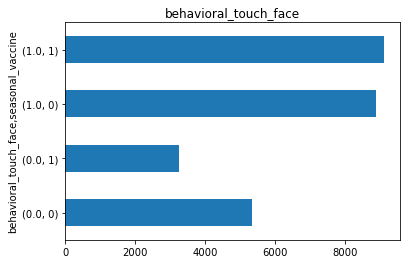

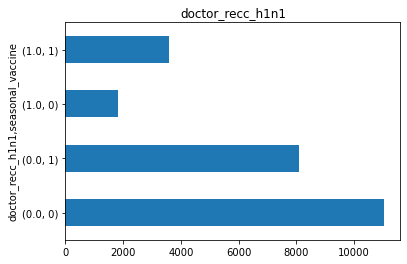

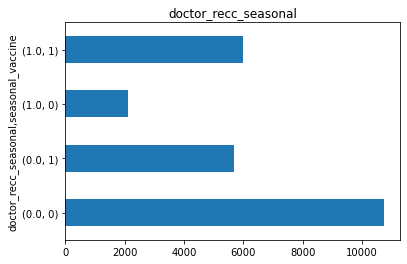

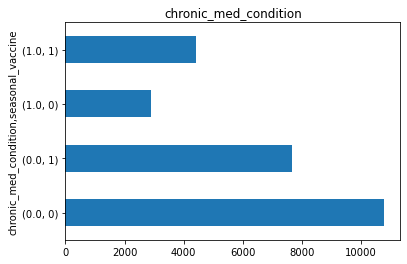

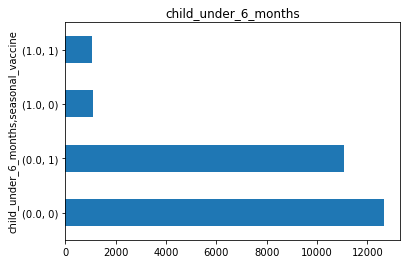

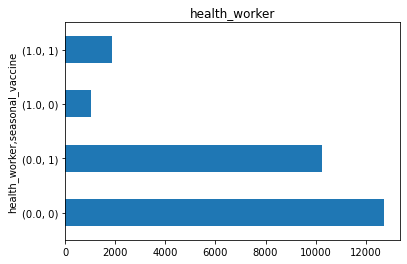

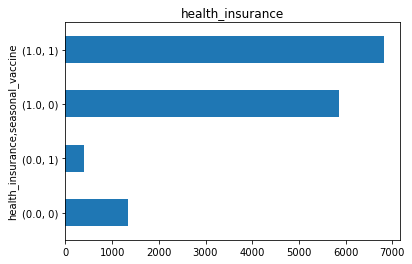

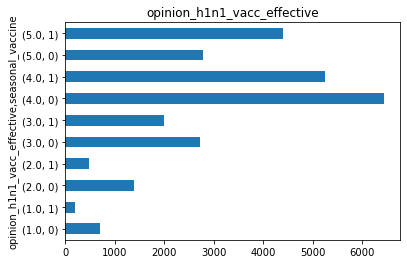

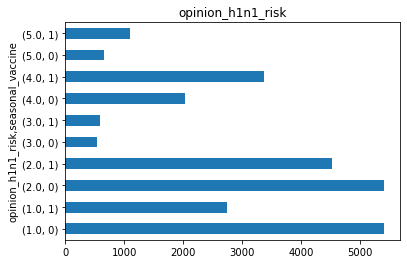

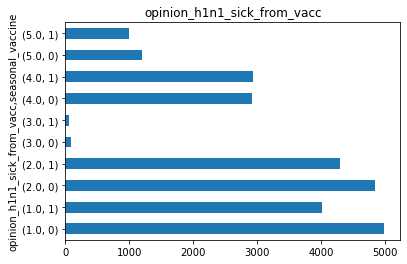

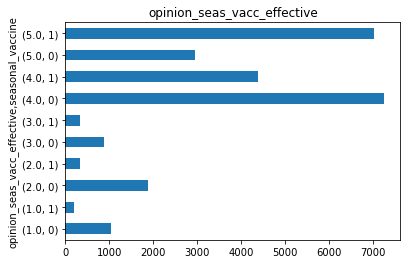

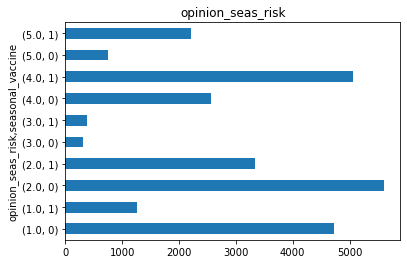

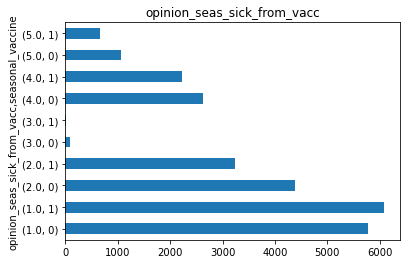

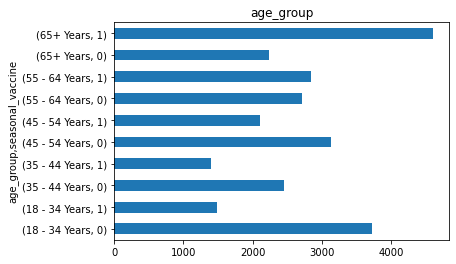

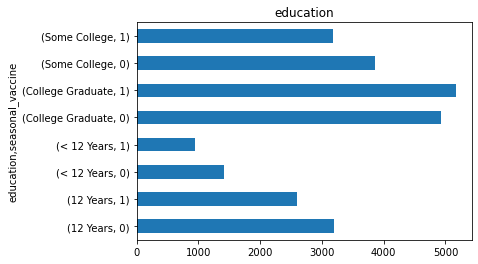

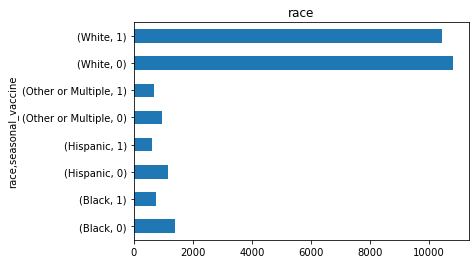

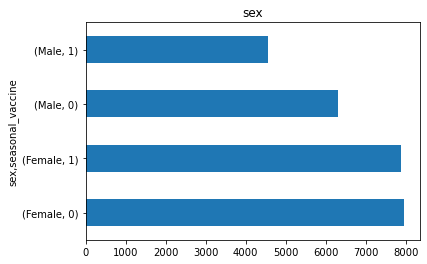

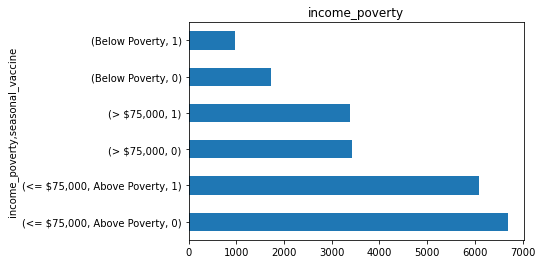

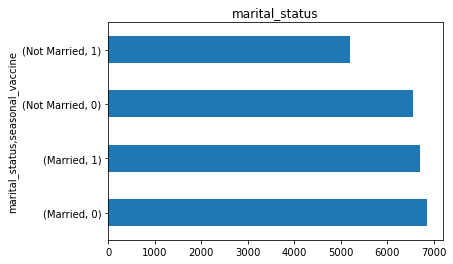

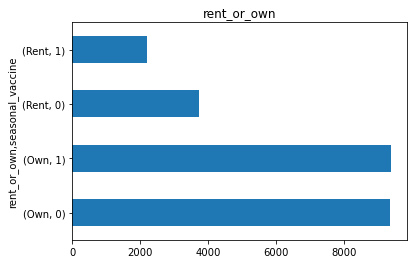

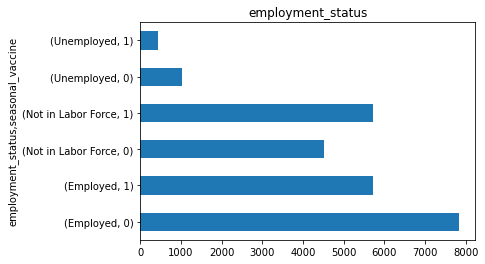

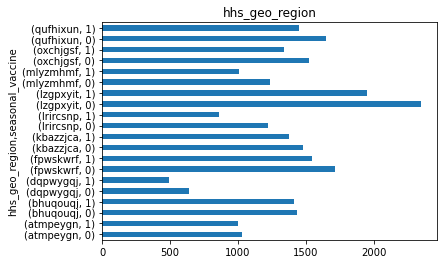

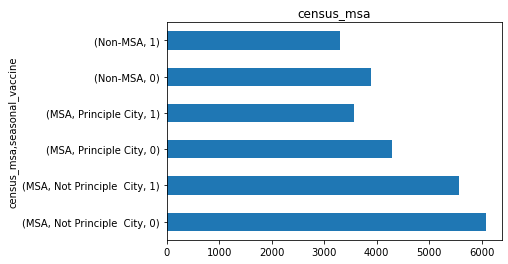

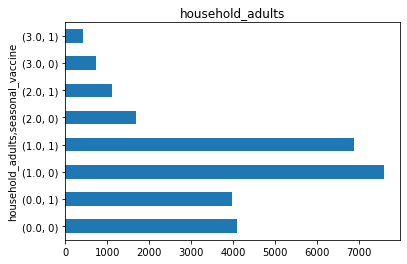

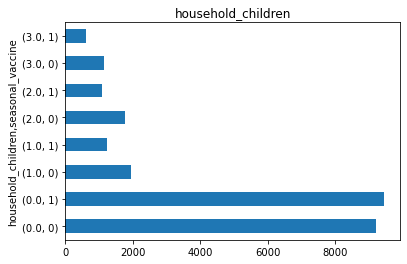

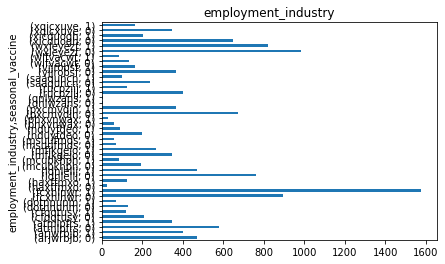

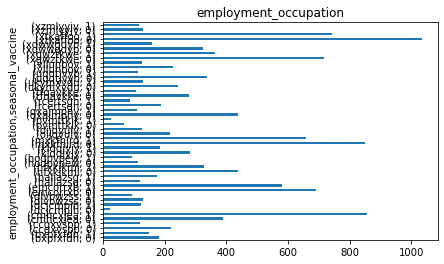

In [12]:
# bar chart view of each columns in the dataset broken down by whether the respondent got vaccinated or not

columns = df_merged.drop(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)

for x in columns:
    df_merged[['seasonal_vaccine', x]].groupby([x, 'seasonal_vaccine']).size().plot(kind='barh')
    plt.title(x)
    plt.show()

Some columns (e.g., behavioral seasonal vaccine) appear to have less impact on whether the respondent got vaccinated or not whereas some columns (e.g., doctor's recommendation on seasonal vaccine) appear to have some impact on whether the respondent got vaccinated or not. We will need to validate whether some columns have more influence on respondent getting vaccinated through predictive modeling.

In [13]:
## We are dropping the following 3 columns as their responses were difficult to comprehend (e.g., qufhixun)

df_merged.drop(columns = ['hhs_geo_region', 'employment_industry', 'employment_occupation'], 
               axis = 1, inplace = True)

In [14]:
df_master = df_merged.dropna()

We have decided to drop all null values as the team did not wanted to impose any bias to the missing data rows/fields, especially when all numeric values are integers based on survey responses

In [15]:
df_master.shape

(11794, 35)

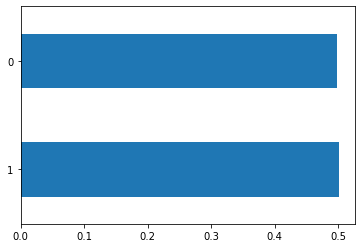

In [16]:
# We have balanced target dataset

df_master['seasonal_vaccine'].value_counts(normalize=True).sort_index(ascending=False).plot(kind = "barh");

<hr style="border: 1px solid black">

## Predictive Modeling

### 1. Baseline Model

For the baseline model, the team picked 3 columns (just as a starting point) that appear to have the greatest impact on the target variable based on the EDA and our prior knowledge. The team chose to do log regression model as the target variable is binary, which the log regression model is optimized for. 

#### Pre-processing Steps

Overall pre-processing steps before running a model:
1. Set x and y for the model
2. Conduct train-test split
3. Execute relevant pre-processing (e.g., standard scaling and one-hot encoding)

In [17]:
# Setting up for the baseline model
X_base = df_master[['doctor_recc_seasonal', 'health_insurance', 'opinion_seas_vacc_effective']]
y_base = df_master['seasonal_vaccine']

In [18]:
# Train Test Split
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, 
                                                                        y_base, 
                                                                        test_size = .2, 
                                                                        random_state=22)

In [19]:
# Applying Standard Scaler
scaler = StandardScaler()
X_train_base_sc = scaler.fit_transform(X_train_base)
X_test_base_sc = scaler.transform(X_test_base)

#### Model Evaluation

Overall model evaluation steps:
1. Choose a model
2. Fit a model
3. Make prediction based on model
4. Calculate evaluation metric (i.e., accuracy, precision, recall scores, ROC curve, AUC, and confusion matrix)

In [20]:
# Using Log Regression as the target is binary
logreg = LogisticRegression(random_state = 7)
logreg.fit(X_train_base_sc, y_train_base)

LogisticRegression(random_state=7)

In [21]:
y_train_base_pred = logreg.predict(X_train_base_sc)
y_test_base_pred = logreg.predict(X_test_base_sc)

In [22]:
# Various score calculations
base_train_acc_score = accuracy_score(y_train_base, y_train_base_pred)
base_test_acc_score = accuracy_score(y_test_base, y_test_base_pred)
base_train_pre_score = precision_score(y_train_base, y_train_base_pred)
base_test_pre_score = precision_score(y_test_base, y_test_base_pred)
base_train_recall_score = recall_score(y_train_base, y_train_base_pred)
base_test_recall_score = recall_score(y_test_base, y_test_base_pred)

print("Accuracy Score for Train Data:   ", base_train_acc_score)
print("Accuracy Score for Test Data:    ", base_test_acc_score)
print("Precision Score for Train Data:  ", base_train_pre_score)
print("Precision Score for Test Data:   ", base_test_pre_score)
print("Recall Score for Train Data:     ", base_train_recall_score)
print("Recall Score for Test Data:      ", base_test_recall_score)

Accuracy Score for Train Data:    0.749443561208267
Accuracy Score for Test Data:     0.7579482831708351
Precision Score for Train Data:   0.7568382511307344
Precision Score for Test Data:    0.7552921253175275
Recall Score for Train Data:      0.7399452516319225
Recall Score for Test Data:       0.7597955706984668


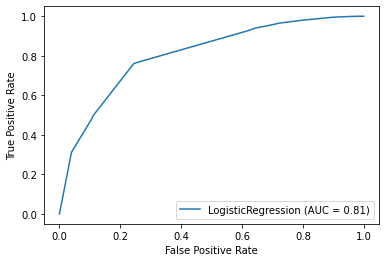

In [23]:
# ROC curve
plot_roc_curve(logreg, X_test_base_sc, y_test_base);

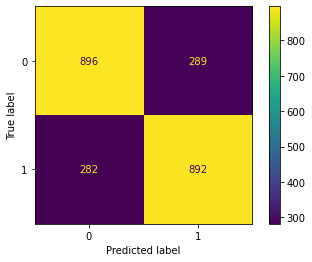

In [24]:
# Confusion Matrix
plot_confusion_matrix(logreg,
                      X_test_base_sc,
                      y_test_base);

### 2. Log Regression Model with All Columns and Default L2 Regularization

For the second model, the team decided to use all columns and uitlize log regression model with its default regularization setting (L2).

#### Pre-processing Steps

In [25]:
# Choose what non-numeric columns to do either OHE or OrdinalEncoder
columns = ['age_group', 'education', 'race', 'sex', 'income_poverty', 
           'marital_status', 'rent_or_own', 'employment_status', 'census_msa']

for x in columns:
    print(df_master[x].value_counts().sort_index())
    print()

18 - 34 Years    2370
35 - 44 Years    1704
45 - 54 Years    2400
55 - 64 Years    2563
65+ Years        2757
Name: age_group, dtype: int64

12 Years            2644
< 12 Years           985
College Graduate    4802
Some College        3363
Name: education, dtype: int64

Black                 910
Hispanic              742
Other or Multiple     685
White                9457
Name: race, dtype: int64

Female    6997
Male      4797
Name: sex, dtype: int64

<= $75,000, Above Poverty    6750
> $75,000                    3629
Below Poverty                1415
Name: income_poverty, dtype: int64

Married        6340
Not Married    5454
Name: marital_status, dtype: int64

Own     8930
Rent    2864
Name: rent_or_own, dtype: int64

Employed              6602
Not in Labor Force    4500
Unemployed             692
Name: employment_status, dtype: int64

MSA, Not Principle  City    5116
MSA, Principle City         3451
Non-MSA                     3227
Name: census_msa, dtype: int64



The team decided to do one-hot encoding, instead of ordinal encoding, for the categorical columns. Ordinal encoding assumes that the numerical difference between consecutive categories is constant and meaningful. This may result in misleading implications for some columns (e.g., race, income and education level). For this reason, the team decided to do one-hot encoding for the categorical columns. 

In [26]:
# Setting up for the baseline model

X_m2 = df_master.drop('seasonal_vaccine', axis=1)
y_m2 = df_master['seasonal_vaccine']

In [27]:
# Train Test Split
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_m2, 
                                                                y_m2, 
                                                                test_size = .2, 
                                                                random_state=22)

In [28]:
# OHE for Train Set
ohe_columns = ['age_group', 'education', 'race', 'sex', 'income_poverty', 
           'marital_status', 'rent_or_own', 'employment_status', 'census_msa']

ohe = OneHotEncoder(drop = 'first')
ohe.fit(X_train_m2[ohe_columns])

X_train_m2_ohe = pd.DataFrame(ohe.transform(X_train_m2[ohe_columns]).todense(), 
                              columns = ohe.get_feature_names(), index=X_train_m2.index)

In [29]:
X_train_m2_numeric = X_train_m2.drop(columns = ['age_group', 'education', 'race', 'sex', 'income_poverty', 
           'marital_status', 'rent_or_own', 'employment_status', 'census_msa', 'respondent_id'], axis = 1)

In [30]:
X_train_m2_concat = pd.concat([X_train_m2_numeric, X_train_m2_ohe], axis=1)

In [31]:
# OHE for Test Set
X_test_m2_ohe = pd.DataFrame(ohe.transform(X_test_m2[ohe_columns]).todense(), 
                              columns = ohe.get_feature_names(), index=X_test_m2.index)

In [32]:
X_test_m2_numeric = X_test_m2.drop(columns = ['age_group', 'education', 'race', 'sex', 'income_poverty', 
           'marital_status', 'rent_or_own', 'employment_status', 'census_msa', 'respondent_id'], axis = 1)

In [33]:
X_test_m2_concat = pd.concat([X_test_m2_numeric, X_test_m2_ohe], axis=1)

In [34]:
# Standard Scaler
scaler = StandardScaler()
X_train_m2_concat_sc = scaler.fit_transform(X_train_m2_concat)
X_test_m2_concat_sc = scaler.transform(X_test_m2_concat)

#### Model Evaluation

In [35]:
# Log Regression
logreg = LogisticRegression(random_state = 5)
logreg.fit(X_train_m2_concat_sc, y_train_m2)

LogisticRegression(random_state=5)

In [36]:
# Predict based on Log Regression model
y_train_m2_pred = logreg.predict(X_train_m2_concat_sc)
y_test_m2_pred = logreg.predict(X_test_m2_concat_sc)

In [37]:
# Evaluation Metric #1 - Accuracy, Precision, Recall scores
m2_train_acc_score = accuracy_score(y_train_m2, y_train_m2_pred)
m2_test_acc_score = accuracy_score(y_test_m2, y_test_m2_pred)
m2_train_pre_score = precision_score(y_train_m2, y_train_m2_pred)
m2_test_pre_score = precision_score(y_test_m2, y_test_m2_pred)
m2_train_recall_score = recall_score(y_train_m2, y_train_m2_pred)
m2_test_recall_score = recall_score(y_test_m2, y_test_m2_pred)

print("Accuracy Score for Train Data:   ", m2_train_acc_score)
print("Accuracy Score for Test Data:    ", m2_test_acc_score)
print("Precision Score for Train Data:  ", m2_train_pre_score)
print("Precision Score for Test Data:   ", m2_test_pre_score)
print("Recall Score for Train Data:     ", m2_train_recall_score)
print("Recall Score for Test Data:      ", m2_test_recall_score)

Accuracy Score for Train Data:    0.8220455749867515
Accuracy Score for Test Data:     0.8295888088172955
Precision Score for Train Data:   0.8348603839441536
Precision Score for Test Data:    0.8344887348353552
Recall Score for Train Data:      0.8058538639713624
Recall Score for Test Data:       0.8202725724020443


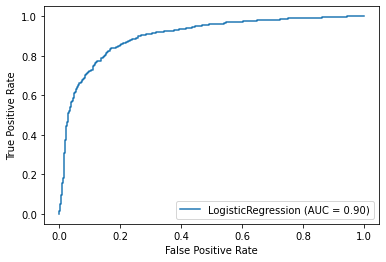

In [38]:
# Evaluation Metric #2 - ROC curve
plot_roc_curve(logreg, X_test_m2_concat_sc, y_test_m2);

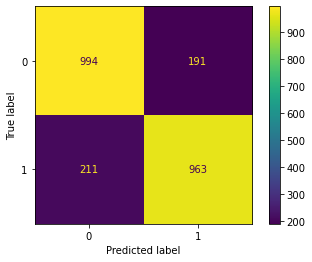

In [39]:
# Evaluation Metric #3 - Confusion Matrix

plot_confusion_matrix(logreg,
                      X_test_m2_concat_sc,
                      y_test_m2);

### 3. Log Regression Model with All Columns and L1 Regularization

For the third model, the team decided to use all columns and uitlize log regression model with different regularization setting (L1). 

#### Model Evaluation

In [40]:
# Log Regression
logreg2 = LogisticRegression(penalty = 'l1', solver = 'saga',random_state = 5)
logreg2.fit(X_train_m2_concat_sc, y_train_m2)

LogisticRegression(penalty='l1', random_state=5, solver='saga')

In [41]:
# Predict based on Log Regression model
y_train_m3_pred = logreg2.predict(X_train_m2_concat_sc)
y_test_m3_pred = logreg2.predict(X_test_m2_concat_sc)

In [42]:
# Evaluation Metric #1 - Accuracy, Precision, Recall scores
m3_train_acc_score = accuracy_score(y_train_m2, y_train_m3_pred)
m3_test_acc_score = accuracy_score(y_test_m2, y_test_m3_pred)
m3_train_pre_score = precision_score(y_train_m2, y_train_m3_pred)
m3_test_pre_score = precision_score(y_test_m2, y_test_m3_pred)
m3_train_recall_score = recall_score(y_train_m2, y_train_m3_pred)
m3_test_recall_score = recall_score(y_test_m2, y_test_m3_pred)

print("Accuracy Score for Train Data:   ", m3_train_acc_score)
print("Accuracy Score for Test Data:    ", m3_test_acc_score)
print("Precision Score for Train Data:  ", m3_train_pre_score)
print("Precision Score for Test Data:   ", m3_test_pre_score)
print("Recall Score for Train Data:     ", m3_train_recall_score)
print("Recall Score for Test Data:      ", m3_test_recall_score)

Accuracy Score for Train Data:    0.8224695283518813
Accuracy Score for Test Data:     0.8300127172530734
Precision Score for Train Data:   0.8352966841186736
Precision Score for Test Data:    0.8346320346320346
Recall Score for Train Data:      0.8062750052642662
Recall Score for Test Data:       0.8211243611584327


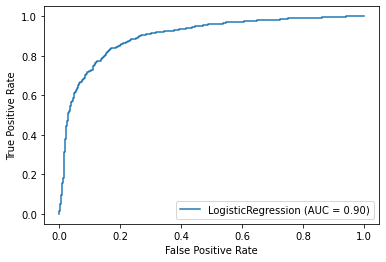

In [43]:
# Evaluation Metric #2 - ROC curve
plot_roc_curve(logreg2, X_test_m2_concat_sc, y_test_m2);

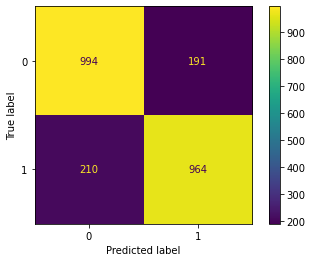

In [44]:
# Evaluation Metric #3 - Confusion Matrix

plot_confusion_matrix(logreg2,
                      X_test_m2_concat_sc,
                      y_test_m2);

### 4. Log Regression Model with Columns Selected from Decision Tree Model's Feature Importance Function

For the fourth model, the team decided to Decision Tree model's feature importance method to select the most relevant columns and then run regular log regression model based on the selected columns.

#### Pre-processing

In [45]:
# Using decision tree to identify feature importance for both numerical and transformed catagorical dataframe
# Call feature_name used 
feature_used = X_train_m2_concat.columns
# Intiate and fit DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_m2_concat, y_train_m2)
# Using dt.feature_importances_ paramter evaluate the feature importance for each columns
for fi, feature in zip(dt.feature_importances_, feature_used):
    print(fi, feature)

0.03088341175802495 h1n1_concern
0.025023842870112372 h1n1_knowledge
0.004983948971353987 behavioral_antiviral_meds
0.014429427749852033 behavioral_avoidance
0.004180907164142362 behavioral_face_mask
0.01056284249939438 behavioral_wash_hands
0.009509486134526785 behavioral_large_gatherings
0.012446675774632564 behavioral_outside_home
0.01141396467860523 behavioral_touch_face
0.039380949169025105 doctor_recc_h1n1
0.06263329495711645 doctor_recc_seasonal
0.011727597961321863 chronic_med_condition
0.00788575334187816 child_under_6_months
0.007531327590925309 health_worker
0.015307447386299793 health_insurance
0.024471598298131187 opinion_h1n1_vacc_effective
0.03141776215900992 opinion_h1n1_risk
0.027667955069623815 opinion_h1n1_sick_from_vacc
0.11094419909515965 opinion_seas_vacc_effective
0.057586790499086354 opinion_seas_risk
0.026095616198426628 opinion_seas_sick_from_vacc
0.02049492744833389 household_adults
0.020454181971583045 household_children
0.1975339203978011 h1n1_vaccine
0.009

In [46]:
# Use features with weight greater than 0.05
X_feature = df_master[['doctor_recc_seasonal','opinion_seas_vacc_effective', 'opinion_seas_risk', 'h1n1_vaccine']]
y_feature = df_master['seasonal_vaccine']

In [47]:
# Train Test Split
X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, 
                                                                                    y_feature, 
                                                                                    test_size = .2, 
                                                                                    random_state=22)

In [48]:
# Apply standard scaler 
scaler_ft = StandardScaler()
scaler_ft.fit(X_train_feature)
X_train_ft_sc = scaler_ft.transform(X_train_feature)
X_test_ft_sc = scaler_ft.transform(X_test_feature)

#### Model Evaluation

In [49]:
# Initiate and fit the logistic regression
logreg_ft = LogisticRegression(random_state = 1)
logreg_ft.fit(X_train_ft_sc, y_train_feature)

LogisticRegression(random_state=1)

In [50]:
y_pred_log_ft_test = logreg_ft.predict(X_test_ft_sc)
y_pred_log_ft_train = logreg_ft.predict(X_train_ft_sc)

In [51]:
feature_train_acc_score = accuracy_score(y_train_feature, y_pred_log_ft_train)
feature_test_acc_score = accuracy_score(y_test_feature, y_pred_log_ft_test)
feature_train_pre_score = precision_score(y_train_feature, y_pred_log_ft_train)
feature_test_pre_score = precision_score(y_test_feature, y_pred_log_ft_test)
feature_train_recall_score = recall_score(y_train_feature, y_pred_log_ft_train)
feature_test_recall_score = recall_score(y_test_feature, y_pred_log_ft_test)

print("Accuracy Score for Train Data:   ", feature_train_acc_score)
print("Accuracy Score for Test Data:    ", feature_test_acc_score)
print("Precision Score for Train Data:  ", feature_train_pre_score)
print("Precision Score for Test Data:   ", feature_test_pre_score)
print("Recall Score for Train Data:     ", feature_train_recall_score)
print("Recall Score for Test Data:      ", feature_test_recall_score)

Accuracy Score for Train Data:    0.7843137254901961
Accuracy Score for Test Data:     0.7935565917761763
Precision Score for Train Data:   0.7802560925237505
Precision Score for Test Data:    0.7772397094430993
Recall Score for Train Data:      0.7955359022952201
Recall Score for Test Data:       0.8202725724020443


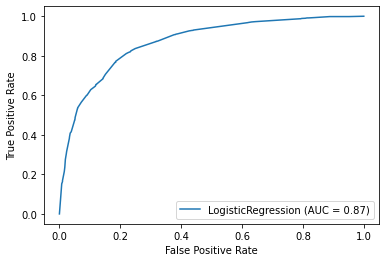

In [52]:
plot_roc_curve(logreg_ft, X_test_ft_sc, y_test_feature);

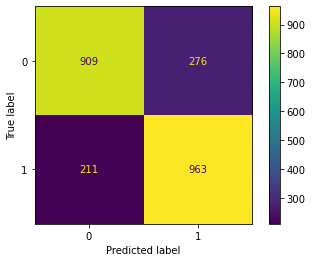

In [53]:
plot_confusion_matrix(logreg_ft, X_test_ft_sc, y_test_feature);

### 5. Decision Tree Model

For the fifth model, the team decided to evaluate the default Decision Tree model

#### Model Evaluation

In [54]:
# Decision Tree model using all features
# Initiate and fit DecisionTreeClassifier
# Here we will use X and y from model 2 
dt = DecisionTreeClassifier(max_depth = 4, random_state=1)
dt.fit(X_train_m2_concat, y_train_m2)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [55]:
# Decisiion tree prediction for test and train
y_pred_dt_test = dt.predict(X_test_m2_concat)
y_pred_dt_train = dt.predict(X_train_m2_concat)

In [56]:
# Evaluating decision tree model metrics using Sklearn
dt_train_acc_score = accuracy_score(y_train_m2, y_pred_dt_train)
dt_test_acc_score = accuracy_score(y_test_m2, y_pred_dt_test)
dt_train_pre_score = precision_score(y_train_m2, y_pred_dt_train)
dt_test_pre_score = precision_score(y_test_m2, y_pred_dt_test)
dt_train_recall_score = recall_score(y_train_m2, y_pred_dt_train)
dt_test_recall_score = recall_score(y_test_m2, y_pred_dt_test)

# Print the metrics
print("Accuracy Score for Train Data:   ", dt_train_acc_score)
print("Accuracy Score for Test Data:    ", dt_test_acc_score)
print("Precision Score for Train Data:  ", dt_train_pre_score)
print("Precision Score for Test Data:   ", dt_test_pre_score)
print("Recall Score for Train Data:     ", dt_train_recall_score)
print("Recall Score for Test Data:      ", dt_test_recall_score)

Accuracy Score for Train Data:    0.802543720190779
Accuracy Score for Test Data:     0.7990674014412886
Precision Score for Train Data:   0.809656652360515
Precision Score for Test Data:    0.7966101694915254
Recall Score for Train Data:      0.7944830490629606
Recall Score for Test Data:       0.8006814310051107


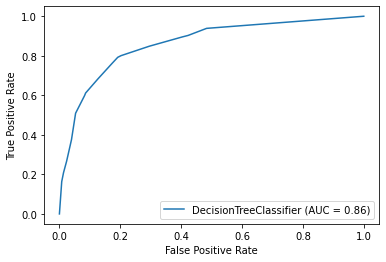

In [57]:
plot_roc_curve(dt, X_test_m2_concat, y_test_m2);

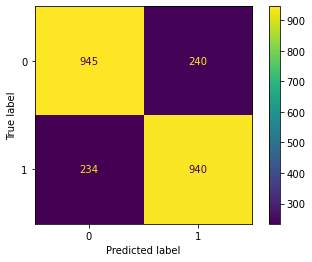

In [58]:
plot_confusion_matrix(dt, X_test_m2_concat, y_test_m2);

### Choosing the Best Model

The team decided to evaluate the model's performance based on 1) accuracy metric and 2) AUC score. 

The reason for using the accuracy score instead of the precision and recall score is because: 

- The target dataset is balanced and binary
- The business problem focuses on the general ability to correctly identify whether a policy holder gets vaccinated or not per different survey responses
- Accuracy score is the easiest to interpret for the client

Based on the two metrics, **the Log Regression Model with L1 Regularization** has been selected as the best/final model. 

### Coefficient Interpretation

Three columns / x-variables that have the highest positive coefficient are:

- Doctor's Recommendation for Seasonal Vaccine
- Opinion on Effectiveness of Seasonal Vaccine
- Opinion on Risk of Getting Seasonal Flu

*We have decided to exclude H1N1 Vaccination column as it pertains to a different business problem

A x-variables with a high coefficient means that it has more impact on target variable compared to other x-variables. In this regards, the team will make the final recommendations to the leadership team based on the top 3 x-variables.

In [59]:
coefficients = logreg2.coef_[0]

# Print coefficients 
for coef, column in zip(coefficients, X_test_m2_concat.columns):
    print("Column Name:", column, '\n' 
          "Coefficient:", coef)

Column Name: h1n1_concern 
Coefficient: -0.0063262269444470075
Column Name: h1n1_knowledge 
Coefficient: 0.12262812657501827
Column Name: behavioral_antiviral_meds 
Coefficient: 0.008703669337212373
Column Name: behavioral_avoidance 
Coefficient: -0.04178421705923621
Column Name: behavioral_face_mask 
Coefficient: -0.008873758407427806
Column Name: behavioral_wash_hands 
Coefficient: 0.02832866552801931
Column Name: behavioral_large_gatherings 
Coefficient: 0.03450614039144234
Column Name: behavioral_outside_home 
Coefficient: 0.00983773032982486
Column Name: behavioral_touch_face 
Coefficient: 0.11111073514601097
Column Name: doctor_recc_h1n1 
Coefficient: -0.476711520250406
Column Name: doctor_recc_seasonal 
Coefficient: 0.8492824638086388
Column Name: chronic_med_condition 
Coefficient: 0.06652839734507
Column Name: child_under_6_months 
Coefficient: -0.011171474530173123
Column Name: health_worker 
Coefficient: 0.17610995929999712
Column Name: health_insurance 
Coefficient: 0.16920

<hr style="border: 1px solid black">

## Business Recommendation / Conclusion

As discussed in the introduction, mass immunization / vaccination has an immense societal and economic benefits as well as positive financial impact on insurance / healthcare companies. 

In order to increase the vaccination rate, we propose Jelly Insurance Co's leadership to implement following strategies:

1. Educate primary care physicians in the network to recommend vaccination for seasonal flu
2. Increase marketing campaign budget for effectiveness of seasonal flu vaccine
3. Raise awareness of seasonal flu risk via various marketing and communication channels

Please contact the team for any questions. 